# Gestion des recommandations

## Recuperation des données

In [110]:
import json
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder
import random

# Load the data
dir1 = "images"
dir2 = "ExifDatatest.json"
dir = os.path.join(dir1, dir2)

data = pd.read_json(dir)
data['result'] = random.choices(["Yes", "No"], k=len(data))
print(data.head())
print(data.tail())

       theme                    image  width  height format orientation  \
0  Exoplanet          55_Cancri_b.jpg   1024     768    PNG     no exif   
1  Exoplanet         Gliese_876_e.jpg   1587     919    PNG     no exif   
2  Exoplanet                XO-3b.jpg    800     500   JPEG     no exif   
3  Exoplanet  OGLE-2005-BLG-169Lb.jpg   1271     746   JPEG     no exif   
4  Exoplanet          Kepler-242b.jpg   1980    1200   JPEG     no exif   

        color_0        color_1          color_2          color_3  \
0     [0, 0, 0]   [64, 64, 64]        [0, 0, 0]        [0, 0, 0]   
1     [0, 0, 0]   [64, 64, 64]     [64, 64, 64]  [128, 128, 128]   
2     [0, 0, 0]    [204, 0, 0]  [128, 128, 128]  [192, 192, 192]   
3  [64, 64, 64]      [0, 0, 0]  [128, 128, 128]     [64, 64, 64]   
4     [0, 0, 0]  [204, 102, 0]  [255, 255, 255]     [64, 64, 64]   

           color_4        red      green       blue result  
0        [0, 0, 0]   5.124176   8.128027  23.954838    Yes  
1        [0, 0, 0]

## Labelisation des données

In [111]:
# on enleve les colonnes inutiles
data.drop('orientation', axis=1, inplace=True)
data.tail()

,theme,image,width,height,format,color_0,color_1,color_2,color_3,color_4,red,green,blue,result
350,Voitures,Ferrari_250_GT_Coupé_Pinin_Farina.jpg,5408,3472,JPEG,"[64, 64, 64]","[64, 64, 64]","[192, 192, 192]","[128, 128, 128]","[192, 192, 192]",106.687133,106.684522,107.811067,Yes
351,Voitures,BMW_Mille_Miglia.jpg,1087,697,JPEG,"[0, 0, 0]","[192, 192, 192]","[64, 64, 64]","[128, 128, 128]","[64, 64, 64]",108.326586,105.935440,87.280188,No
352,Voitures,Buick_Regal.jpg,4524,3385,JPEG,"[128, 128, 128]","[64, 64, 64]","[0, 0, 0]","[192, 192, 192]","[192, 192, 192]",99.803718,112.138674,118.061557,No
353,Voitures,Fiat_Centoventi.jpg,2975,2000,JPEG,"[64, 64, 64]","[192, 192, 192]","[0, 0, 0]","[128, 128, 128]","[255, 255, 255]",108.422163,101.934441,104.833197,Yes
354,Voitures,Buick_Velite_6.jpg,4032,3024,JPEG,"[192, 192, 192]","[64, 64, 64]","[255, 255, 255]","[64, 64, 64]","[128, 128, 128]",111.855284,116.608598,128.186564,Yes


In [112]:
# label encoder
themeLabel = LabelEncoder()
data['theme'] = themeLabel.fit_transform(data['theme'])
imageLabel = LabelEncoder()
data['image'] = imageLabel.fit_transform(data['image'])
widthLabel = LabelEncoder()
data['width'] = widthLabel.fit_transform(data['width'])
heightLabel = LabelEncoder()
data['height'] = heightLabel.fit_transform(data['height'])
formatLabel = LabelEncoder()
data['format'] = formatLabel.fit_transform(data['format'])
color_0Label = LabelEncoder()
data['color_0'] = color_0Label.fit_transform(data['color_0'])
color_1Label = LabelEncoder()
data['color_1'] = color_1Label.fit_transform(data['color_1'])
color_2Label = LabelEncoder()
data['color_2'] = color_2Label.fit_transform(data['color_2'])
color_3Label = LabelEncoder()
data['color_3'] = color_3Label.fit_transform(data['color_3'])
color_4Label = LabelEncoder()
data['color_4'] = color_4Label.fit_transform(data['color_4'])
redLabel = LabelEncoder()
data['red'] = redLabel.fit_transform(data['red'])
greenLabel = LabelEncoder()
data['green'] = greenLabel.fit_transform(data['green'])
blueLabel = LabelEncoder()
data['blue'] = blueLabel.fit_transform(data['blue'])
resultLabel = LabelEncoder()
data['result'] = resultLabel.fit_transform(data['result'])

data.tail()


TypeError: Encoders require their input to be uniformly strings or numbers. Got ['list']

## Utilisation d'un arbre de décision

In [ ]:
from sklearn import tree

dtc = tree.DecisionTreeClassifier()
pourcent = 0.95
data_tc = data.drop('result', axis=1).iloc[0:int(len(data)*pourcent)]
data_result = data['result'].iloc[0:int(len(data)*pourcent)]
dtc = dtc.fit(data_tc , data_result)
data_result.iloc[0:5]

0    0
1    0
2    0
3    1
4    0
Name: result, dtype: int64

## On affiche l'arbre de decision

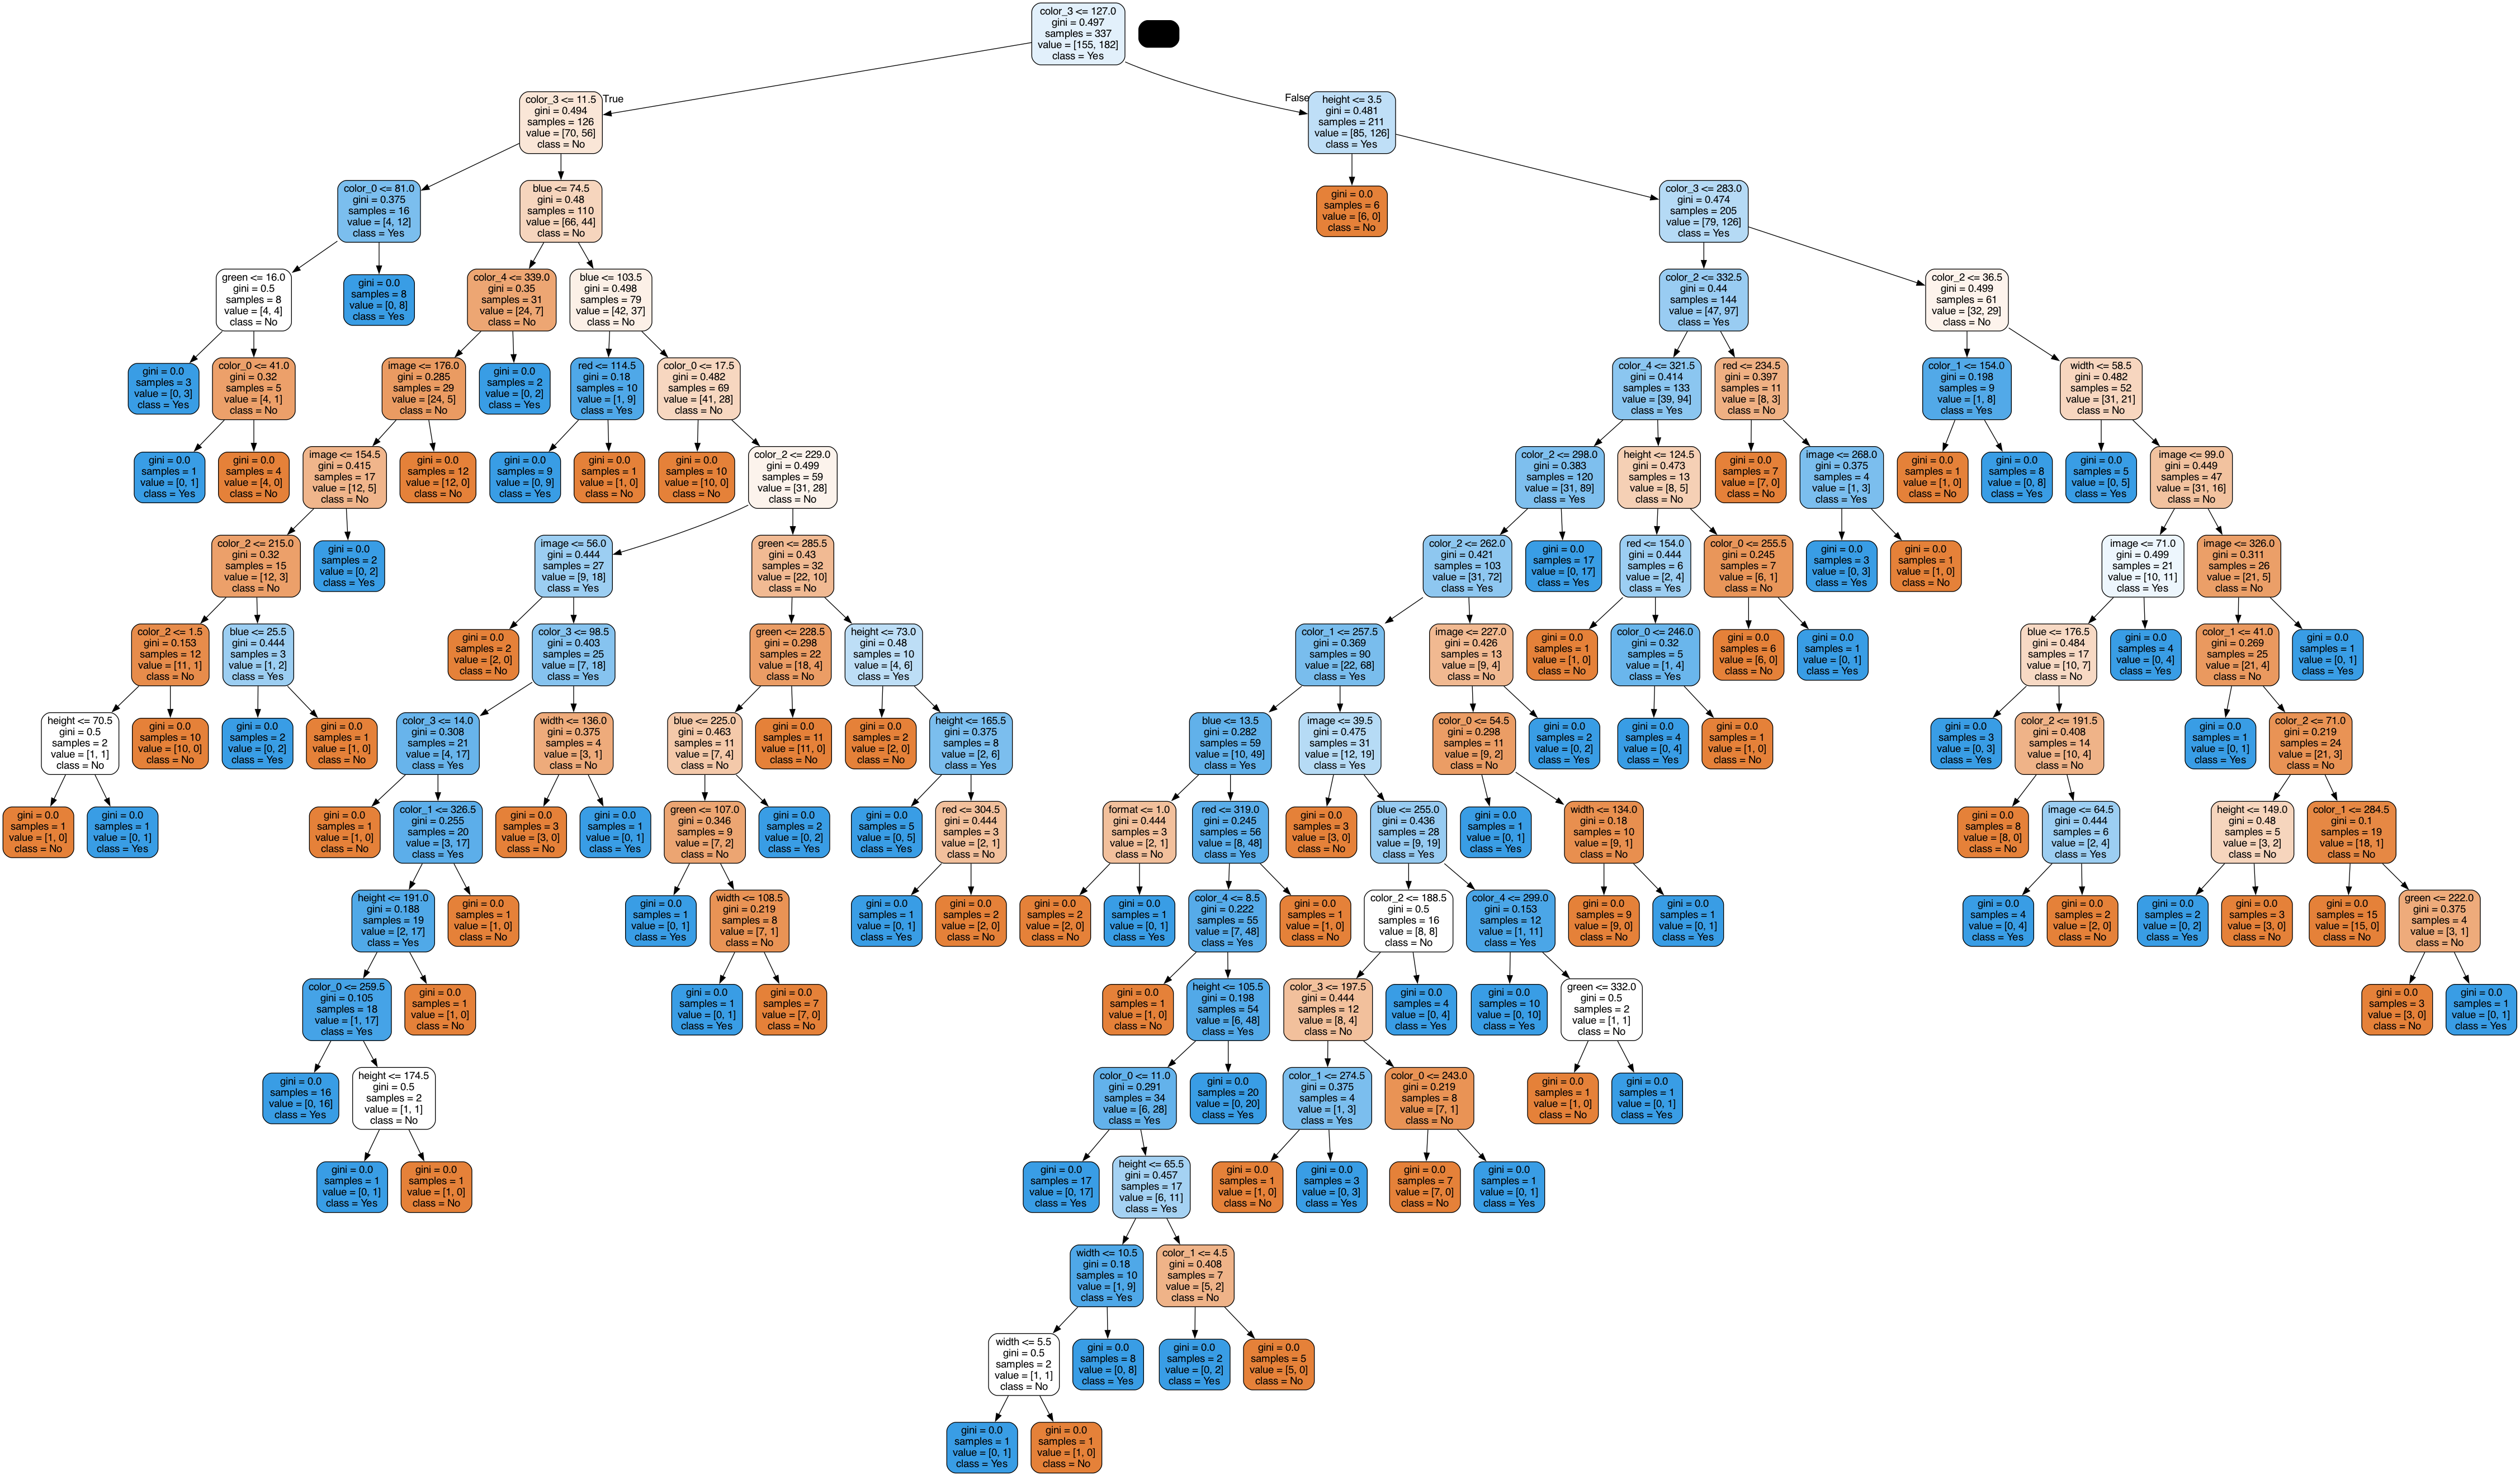

In [ ]:

import graphviz
import pydotplus
from IPython.display import Image, display

dot_data = tree.export_graphviz(dtc, out_file=None,
        feature_names=data_tc.columns,
        filled=True, rounded=True, 
        class_names =
        resultLabel.inverse_transform(
        pd.DataFrame(data_result).result.unique())
        ) 
graph = graphviz.Source(dot_data) 

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
img = Image(pydot_graph.create_png())
display(img)
#pydot_graph.write_png('tree.png')


## Prediction



In [ ]:
# avec la derniere image
prediction = dtc.predict(
    [[
        themeLabel.transform(["Voitures"])[0],
        imageLabel.transform(["Tesla_Model_S.jpg"])[0],
        widthLabel.transform(["7786"])[0],
        heightLabel.transform(["4380"])[0],
        formatLabel.transform(["JPEG"])[0],
        color_0Label.transform(["#1e2821"])[0],
        color_1Label.transform(["#84835f"])[0],
        color_2Label.transform(["#1d3964"])[0],
        color_3Label.transform(["#b3b1af"])[0],
        color_4Label.transform(["#1d3964"])[0],
        redLabel.transform([92.91901662620823])[0],
        greenLabel.transform([105.17334974822148])[0],
        blueLabel.transform([110.4893751011136])[0]
    ]]
)
print(resultLabel.inverse_transform(prediction))
print(dtc.feature_importances_)

ValueError: y contains previously unseen labels: '#1d3964'

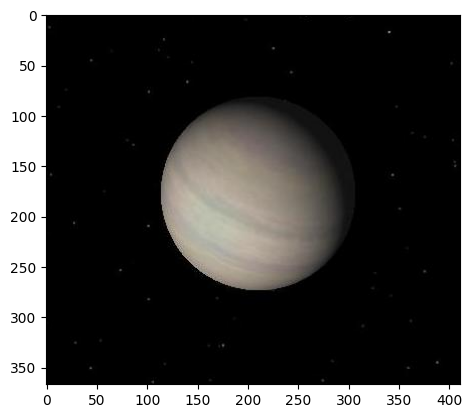

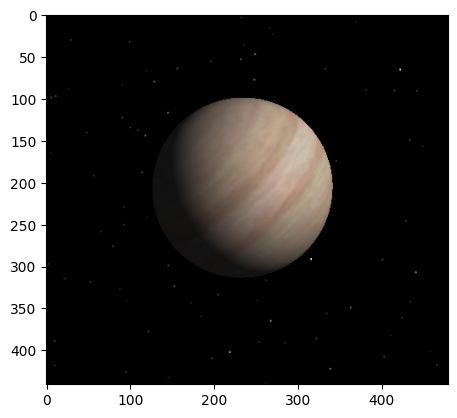

KeyboardInterrupt: Interrupted by user

In [ ]:
# from PIL import Image
# import os
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

# dir = "images"
# themes =  os.listdir(dir)

# for theme in themes: 
#     if theme in {".DS_Store", "ExifData.json","ExifData2.json","ExifDatatest.json"}:
#         pass 
#     else:
#         dir_test = os.path.join(dir, theme)
#         for image in os.listdir(dir_test):
#             if image.endswith(".jpg") :
#                 img_path = os.path.join(dir, theme, image)
#                 img = mpimg.imread(img_path)
#                 imgplot = plt.imshow(img)
#                 plt.show()
#                 test = input("Voulez vous ajouter cette image à votre collection ? (y/n)")
